### Libraries

In [3]:
# data manipluation 
import pandas as pd
import csv
import os
import re
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Immbalanced label data

In [4]:
# Load the files to create the training data

df1 = pd.read_csv('data\Q&A dataset with label - 05 04.csv')
df2 = pd.read_csv('data\Q&A dataset with label - 1502-subtopics with comments (2).csv', header=1)

print(df1.info())
print('\n====================\n')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Label       1371 non-null   object 
 2   Question    2358 non-null   object 
 3   Answer      2352 non-null   object 
dtypes: float64(1), object(3)
memory usage: 73.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   keywords    578 non-null    object
 1   label       1155 non-null   object
 2   Question    1178 non-null   object
 3   Answer      1178 non-null   object
 4   topic       1178 non-null   object
 5   subtopic    958 non-null    object
 6   topic.1     1178 non-null   object
 7   subtopic.1  957 non-null    object
 8   URL source  1 non-null      object
dtypes: object(9)
memory usage: 83.0+ KB
N

#### Cleaning df1

In [5]:
# Drop the unnamed column
df1 = df1.drop(columns='Unnamed: 0', axis=1)
df1 = df1[['Question', 'Answer', 'Label']]
df1 = df1.dropna()

The cells below look into removing label values which include more than 1 label, eg. strategy, analysis

In [6]:
df1['Label'].unique()

array(['taxonomy', 'factual', 'ethics and regulation', 'analysis',
       'strategy', 'analysis, strategy',
       'strategy, ethics and regulation',
       'ethics and regulation, strategy',
       'ethics and regulation, factual',
       'ethics and regulation, analysis',
       'ethics and regulation, taxonomy', 'management', 'Strategy',
       'factual, ethics and regulation', 'science and tech',
       'strategy,analysis', 'anlysis', 'strrategy', 'taxonomy, strategy'],
      dtype=object)

In [7]:
# The code below will change the labels to one specific label. eg different spelling of same label
df1 = df1.replace(['Strategy','strategies', 'strrategy', ''],'strategy')
df1 = df1.replace(['Analysis', 'anlysis'],'analysis')

df1 = df1[df1['Label'].isin(['ethics and regulation', 'analysis', 'strategy', 'science and tech', 'factual', 'taxonomy', 'management'])]
df1['Label'].unique()

array(['taxonomy', 'factual', 'ethics and regulation', 'analysis',
       'strategy', 'management', 'science and tech'], dtype=object)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1395
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1339 non-null   object
 1   Answer    1339 non-null   object
 2   Label     1339 non-null   object
dtypes: object(3)
memory usage: 41.8+ KB


#### Cleaning df2

In [8]:
df2 = df2[['Question', 'Answer', 'label']]
df2 = df2[pd.notnull(df2['label'])]
df2.sample(2)

,Question,Answer,label
626,How can policy-makers and politicians support ...,Policy-makers and politicians should make effo...,Ethics & reg
242,Where can people learn about strategies used t...,People can learn more about both active or pas...,taxonomies


In [9]:
df2.rename(columns={'label': 'Label'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1177
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1155 non-null   object
 1   Answer    1155 non-null   object
 2   Label     1155 non-null   object
dtypes: object(3)
memory usage: 36.1+ KB


In [10]:
# The code below will change the labels to one specific label. eg different spelling of same label
df2 = df2.replace(['Strategy','strategies', 'strrategy', 'str'],'strategy')
df2 = df2.replace(['Ethics and regulation', 'Ethics & reg', 'ethic and reg'],'ethics and regulation')
df2 = df2.replace(['science&tech'],'science and tech')
df2 = df2.replace(['taxonomies'],'taxonomy')
df2 = df2.replace(['factual ', 'factual,', 'Factual'],'factual')

In [11]:
df2 = df2[df2['Label'].isin(['ethics and regulation', 'analysis', 'strategy', 'science and tech', 'factual', 'taxonomy', 'management'])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 1177
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1066 non-null   object
 1   Answer    1066 non-null   object
 2   Label     1066 non-null   object
dtypes: object(3)
memory usage: 33.3+ KB


#### Merging df1 and df2

In [12]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2405 non-null   object
 1   Answer    2405 non-null   object
 2   Label     2405 non-null   object
dtypes: object(3)
memory usage: 56.5+ KB


<Axes: xlabel='Label'>

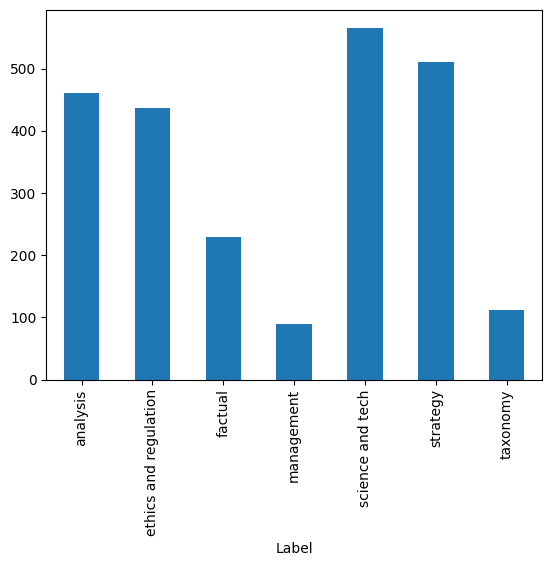

In [13]:
df.groupby(['Label']).size().plot.bar()

In [14]:
df['Label'] = df['Label'].replace(['factual', 'taxonomy', 'management'], 'others')
df['Label'].value_counts()

science and tech         566
strategy                 511
analysis                 461
ethics and regulation    436
others                   431
Name: Label, dtype: int64

In [15]:
# save the file
df.to_csv('data/train_combined_imbalanced.csv', index=False)

### Balanced Data

#### Load the data

In [16]:
# Load the train_combined_imabalanced.csv file created earlier
df = pd.read_csv('data/train_combined_imbalanced.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2405 non-null   object
 1   Answer    2405 non-null   object
 2   Label     2405 non-null   object
dtypes: object(3)
memory usage: 56.5+ KB


#### Split the data

In [17]:
df_strat = df[df['Label'] == 'strategy'][:400]
df_strat_test = df[df['Label'] == 'strategy'][400:]

df_sci = df[df['Label'] == 'science and tech'][:400]
df_sci_test = df[df['Label'] == 'science and tech'][400:]

df_analysis = df[df['Label'] == 'analysis'][:400]
df_analysis_test = df[df['Label'] == 'analysis'][400:]

df_ethics = df[df['Label'] == 'ethics and regulation'][:400]
df_ethics_test = df[df['Label'] == 'ethics and regulation'][400:]

df_other = df[df['Label'] == 'others'][:400]
df_other_test = df[df['Label'] == 'others'][400:]

df_train = pd.concat([df_strat, df_sci, df_analysis, df_ethics, df_other])
df_val = pd.concat([df_strat_test, df_sci_test, df_analysis_test, df_ethics_test, df_other_test])

In [18]:
df_train.shape, df_val.shape

((2000, 3), (405, 3))

In [19]:
# Save the files
df_train.to_csv('data/train_balanced_labels.csv', index=False)
df_val.to_csv('data/validation.csv', index=False)

### Labelled data from 8606 file

In [20]:
# Load the data
df = pd.read_csv('data/Labelling models comparison 7 May - all models with clean dataset.csv', header=[0, 1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 27 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   (Question, Unnamed: 0_level_1)                                       300 non-null    object 
 1   (Answer, Unnamed: 1_level_1)                                         300 non-null    object 
 2   (Topic , Unnamed: 2_level_1)                                         300 non-null    object 
 3   (keywords, Unnamed: 3_level_1)                                       300 non-null    object 
 4   (topic, Unnamed: 4_level_1)                                          5 non-null      object 
 5   (Bidirectional LSMT glove v. 5 Clean, predicted label )              304 non-null    object 
 6   (Unnamed: 6_level_0, vs/Laura)                                       139 non-null    object 
 7   (Laura ,

In [21]:
data = dict()
data['Question'] = df[('Question', 'Unnamed: 0_level_1')].values
data['Answer'] = df[('Answer', 'Unnamed: 1_level_1')].values
data['Label'] = df[('Unnamed: 26_level_0', 'expected')].values

In [22]:
df_clean = pd.DataFrame(data)
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  300 non-null    object
 1   Answer    300 non-null    object
 2   Label     300 non-null    object
dtypes: object(3)
memory usage: 9.4+ KB


In [23]:
df_clean['Label'].value_counts()

analysis                 128
science and tech          83
others                    69
strategy                  13
ethics and regulation      3
ethics and reg             2
others/science&tech        1
Others                     1
Name: Label, dtype: int64

In [24]:
df_clean = df_clean.replace(['ethics and reg', 'others/science&tech', 'Others'], ['ethics and regulation', 'others', 'others'])
df_clean['Label'].value_counts()

analysis                 128
science and tech          83
others                    71
strategy                  13
ethics and regulation      5
Name: Label, dtype: int64

In [25]:
# Save the file as inference data
df_clean.to_csv('data/inference_from_8606.csv', index=False)

In [26]:
df_clean.shape

(300, 3)